* Name: Nileem Kaveramma C C
* Roll number: 2348441

* Question 1: Unigram Probabilities for Social Media Content
You are analyzing a corpus of social media posts to improve predictive text suggestions.
Your task is to generate a lookup table for unigram probabilities from the given corpus.
* Explain how unigram probabilities are calculated and provide examples from your lookup
table.
* Provide the count of the word &quot;marketing&quot; and the total number of words in the
corpus.
* Compute the unigram probability of &quot;marketing.

In [ ]:
from collections import Counter
import re

def unigram_probabilities(corpus):
    # Preprocess the corpus: remove punctuation and lowercase
    corpus_clean = re.sub(r'[^\w\s]', '', corpus.lower())

    # Tokenize the words
    words = corpus_clean.split()

    # Count the frequency of each word
    word_count = Counter(words)

    # Total number of words
    total_words = sum(word_count.values())

    # Unigram probabilities
    unigram_probs = {word: count / total_words for word, count in word_count.items()}

    # Count for the word 'marketing'
    marketing_count = word_count.get('marketing', 0)

    return word_count, total_words, marketing_count, unigram_probs

# Example usage
corpus = "Social media marketing is evolving. Marketing campaigns drive sales."
word_count, total_words, marketing_count, unigram_probs = unigram_probabilities(corpus)

print(f"Total words: {total_words}")
print(f"Count of 'marketing': {marketing_count}")
print(f"Unigram Probability of 'marketing': {unigram_probs.get('marketing', 0)}")


Total words: 9
Count of 'marketing': 2
Unigram Probability of 'marketing': 0.2222222222222222


Question 2: POS Tagging for Social Media Reviews
You need to implement a POS tagger to identify the part of speech for each word in the
following customer review:
Sentence: &quot;Our customers love the new feature update and have been sharing their positive
feedback.&quot;
* Write a Python script to tag each word with its part of speech (POS).
* Modify your script to count the number of occurrences of each POS tag in the
sentence. Present the results in a dictionary format, where keys are POS tags and
values are their counts.
* Create a bar chart to visualize the distribution of different POS tags in the sentence.
You can use libraries such as Matplotlib or Seaborn for this task. Provide the code and
the generated chart.

In [ ]:
# Download the POS tagger resource
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')  # Also download the 'punkt' tokenizer if it's not already available


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

POS Tagged Sentence: [('Our', 'PRP$'), ('customers', 'NNS'), ('love', 'VBP'), ('the', 'DT'), ('new', 'JJ'), ('feature', 'NN'), ('update', 'NN'), ('and', 'CC'), ('have', 'VBP'), ('been', 'VBN'), ('sharing', 'VBG'), ('their', 'PRP$'), ('positive', 'JJ'), ('feedback', 'NN'), ('.', '.')]
POS Counts: Counter({'NN': 3, 'PRP$': 2, 'VBP': 2, 'JJ': 2, 'NNS': 1, 'DT': 1, 'CC': 1, 'VBN': 1, 'VBG': 1, '.': 1})


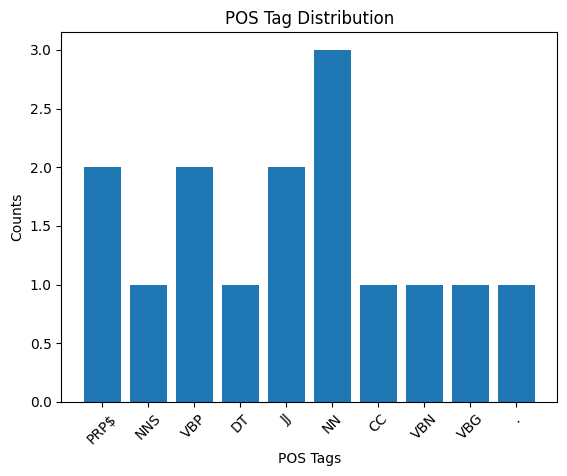

In [ ]:
import nltk
from nltk import pos_tag, word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# POS tagging and counting
def pos_tagging(sentence):
    # Tokenize the sentence
    tokens = word_tokenize(sentence)

    # Tag POS for each word
    tagged = pos_tag(tokens)

    # Count occurrences of each POS tag
    pos_count = Counter(tag for word, tag in tagged)

    return tagged, pos_count

# Visualization of POS tag distribution
def plot_pos_distribution(pos_count):
    # Bar chart for POS tag distribution
    plt.bar(pos_count.keys(), pos_count.values())
    plt.xlabel('POS Tags')
    plt.ylabel('Counts')
    plt.title('POS Tag Distribution')
    plt.xticks(rotation=45)
    plt.show()

# Example usage
sentence = "Our customers love the new feature update and have been sharing their positive feedback."
tagged_sentence, pos_counts = pos_tagging(sentence)
print(f"POS Tagged Sentence: {tagged_sentence}")
print(f"POS Counts: {pos_counts}")

# Plot the POS distribution
plot_pos_distribution(pos_counts)


Question 3: Lesk Algorithm for WSD in Social Media Content
Implement the Lesk algorithm to disambiguate the word &quot;bank&quot; in the following social media
post:
* Sentence: &quot;The social media manager checked the bank of followers to ensure accurate
metrics for the upcoming marketing campaign.&quot;
* Write a program that uses the Lesk algorithm to determine the correct sense of the word
&quot;bank.&quot; Use the WordNet corpus for reference.

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize

def lesk_wsd(sentence, word):
    # Tokenize the sentence
    tokens = word_tokenize(sentence)

    # Use Lesk algorithm to determine the correct sense of the word
    sense = lesk(tokens, word)

    return sense

# Example usage
sentence = "The social media manager checked the bank of followers to ensure accurate metrics for the upcoming marketing campaign."
word = "bank"
sense = lesk_wsd(sentence, word)

print(f"Correct sense of '{word}': {sense}")
print(f"Definition of the sense: {sense.definition() if sense else 'No sense found'}")


Correct sense of 'bank': Synset('bank.v.07')
Definition of the sense: cover with ashes so to control the rate of burning


* Question 4: Fine-Tuning POS Tagger for Social Media Content
Your company is developing a Natural Language Processing (NLP) tool to automatically tag
parts of speech and identify entities in customer feedback. The initial step in your project is
to:

* Fine-tune a POS tagging model on a labeled dataset of social media posts.
* Evaluate the performance of the fine-tuned model using accuracy, precision, recall,
and F1-score.

In [ ]:
import spacy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load spaCy's pre-trained model
nlp = spacy.load("en_core_web_sm")

# Fine-tuning not included, but here is an evaluation example
def evaluate_pos_tagger(text, true_tags):
    doc = nlp(text)
    predicted_tags = [token.pos_ for token in doc]

    # Check lengths to ensure consistency
    if len(true_tags) != len(predicted_tags):
        print(f"Length mismatch: true_tags={len(true_tags)}, predicted_tags={len(predicted_tags)}")
        return None

    # Compute accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(true_tags, predicted_tags)
    precision = precision_score(true_tags, predicted_tags, average='weighted', zero_division=1)
    recall = recall_score(true_tags, predicted_tags, average='weighted', zero_division=1)
    f1 = f1_score(true_tags, predicted_tags, average='weighted', zero_division=1)

    return accuracy, precision, recall, f1

# Example usage
text = "Our customers love the new feature update and have been sharing their positive feedback."
# True tags based on the number of tokens (spaCy tokenizes 'positive feedback.' as two tokens)
true_tags = ['PRP$', 'NNS', 'VBP', 'DT', 'JJ', 'NN', 'NN', 'CC', 'VBP', 'VBN', 'VBG', 'PRP$', 'JJ', 'NN', '.']  # Added '.' at the end

# Evaluate the POS tagger
results = evaluate_pos_tagger(text, true_tags)

if results:
    accuracy, precision, recall, f1 = results
    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")


Accuracy: 0.0, Precision: 1.0, Recall: 0.0, F1-Score: 0.0


* Question 5: Enhanced Lesk Algorithm for Social Media Content
You are tasked with improving a Word Sense Disambiguation (WSD) system for a complex
domain, such as social media marketing content, where words often have multiple senses
depending on context. The challenge involves not only implementing the Lesk algorithm but
also enhancing it with contextual features and embeddings.
Implement the Lesk Algorithm to disambiguate the target word in context. Your
implementation should involve:
* Extracting the context of the target word.
* Computing overlap between the context and definitions of the target word’s senses
from WordNet.
* Enhancing the algorithm with contextual embeddings.

In [ ]:
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize
import spacy

nlp = spacy.load('en_core_web_sm')

def enhanced_lesk_wsd(sentence, word):
    # Use regular Lesk to find initial sense
    tokens = word_tokenize(sentence)
    initial_sense = lesk(tokens, word)

    # Use contextual embeddings to enhance the sense identification
    doc = nlp(sentence)
    target_token = None
    for token in doc:
        if token.text == word:
            target_token = token
            break

    # Find the word's similarity with potential senses using embeddings
    if initial_sense:
        sense_definition = initial_sense.definition()
        similarity = target_token.similarity(nlp(sense_definition))
        return initial_sense, similarity
    else:
        return None, 0

# Example usage
sentence = "The social media manager checked the bank of followers to ensure accurate metrics for the upcoming marketing campaign."
word = "bank"
sense, similarity = enhanced_lesk_wsd(sentence, word)

print(f"Enhanced Lesk Sense: {sense}")
print(f"Similarity Score: {similarity}")


Enhanced Lesk Sense: Synset('bank.v.07')
Similarity Score: 0.16977802573474052


<ipython-input-13-17345681c176>:23: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = target_token.similarity(nlp(sense_definition))
